In [39]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import pickle
import gzip


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [40]:
churners_df = pd.read_csv("../../data/BankChurners.csv", index_col='CLIENTNUM', sep= ',')

churners_df.shape
churners_df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)
# no missing values --> some 'Unknown' values
churners_df.isnull().sum()
churners_df.dtypes
# # Assuming 'df' is your DataFrame containing the dataset
# current_month = 2024 * 12 + 5  # Convert reference date to months
# df['Customer_Tenure'] = current_month - df['Months_on_book']

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [41]:
attrited = churners_df[churners_df['Attrition_Flag'] == "Attrited Customer"].value_counts().sum()
existing = churners_df[churners_df['Attrition_Flag'] == "Existing Customer"].value_counts().sum()

print(f'Amount of attrited clients: {attrited}')
print(f'Amount of existing clients: {existing}')

Amount of attrited clients: 1627
Amount of existing clients: 8500


### Overview

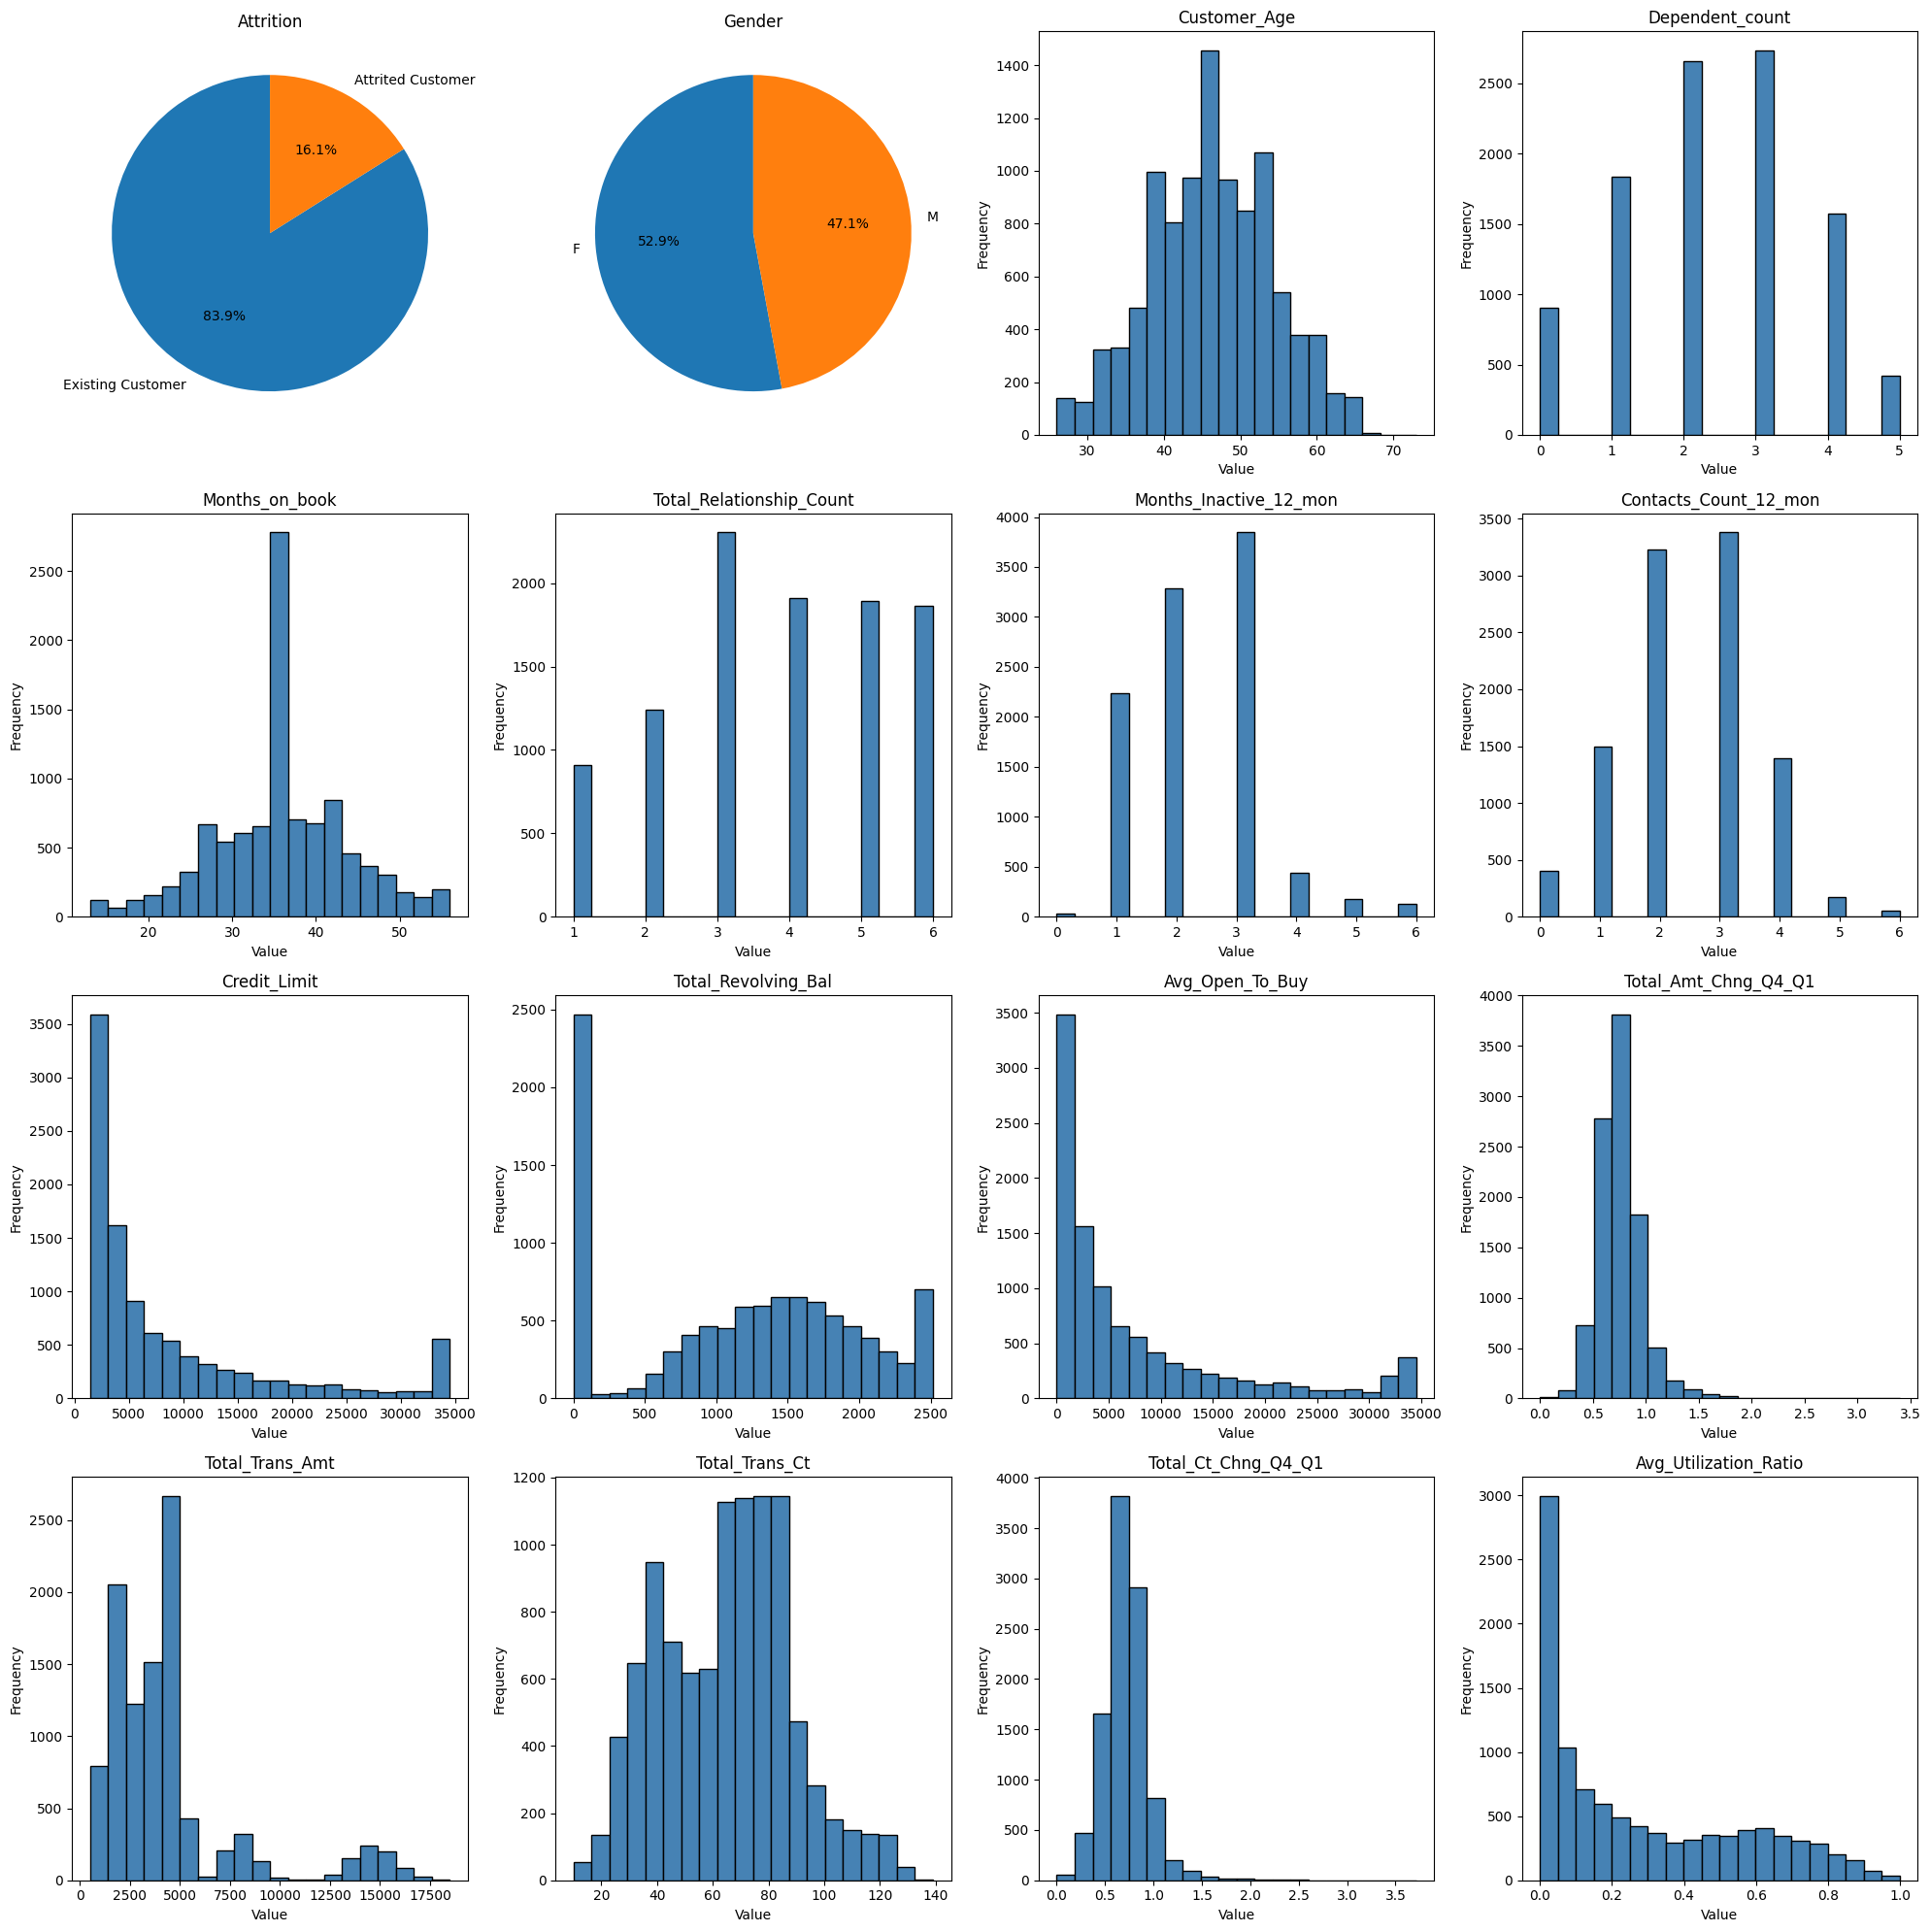

In [63]:
# Get numerical columns
numerical_columns = churners_df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots with a suitable layout
num_cols = len(numerical_columns)
num_rows = (num_cols + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the pie chart of churners in the first plot
churners_distribution = churners_df['Attrition_Flag'].value_counts(normalize=True) * 100
axes[0].pie(churners_distribution, labels=churners_distribution.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Attrition')

# Add Gender distribution as a pie chart after the churners' pie chart
gender_distribution = churners_df['Gender'].value_counts(normalize=True) * 100
axes[1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gender')

# Plot histograms for each numerical column starting from the third plot
for i, col in enumerate(numerical_columns):
    ax = axes[i + 2]
    ax.hist(churners_df[col], bins=20, color='steelblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(num_cols + 2, num_rows * 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

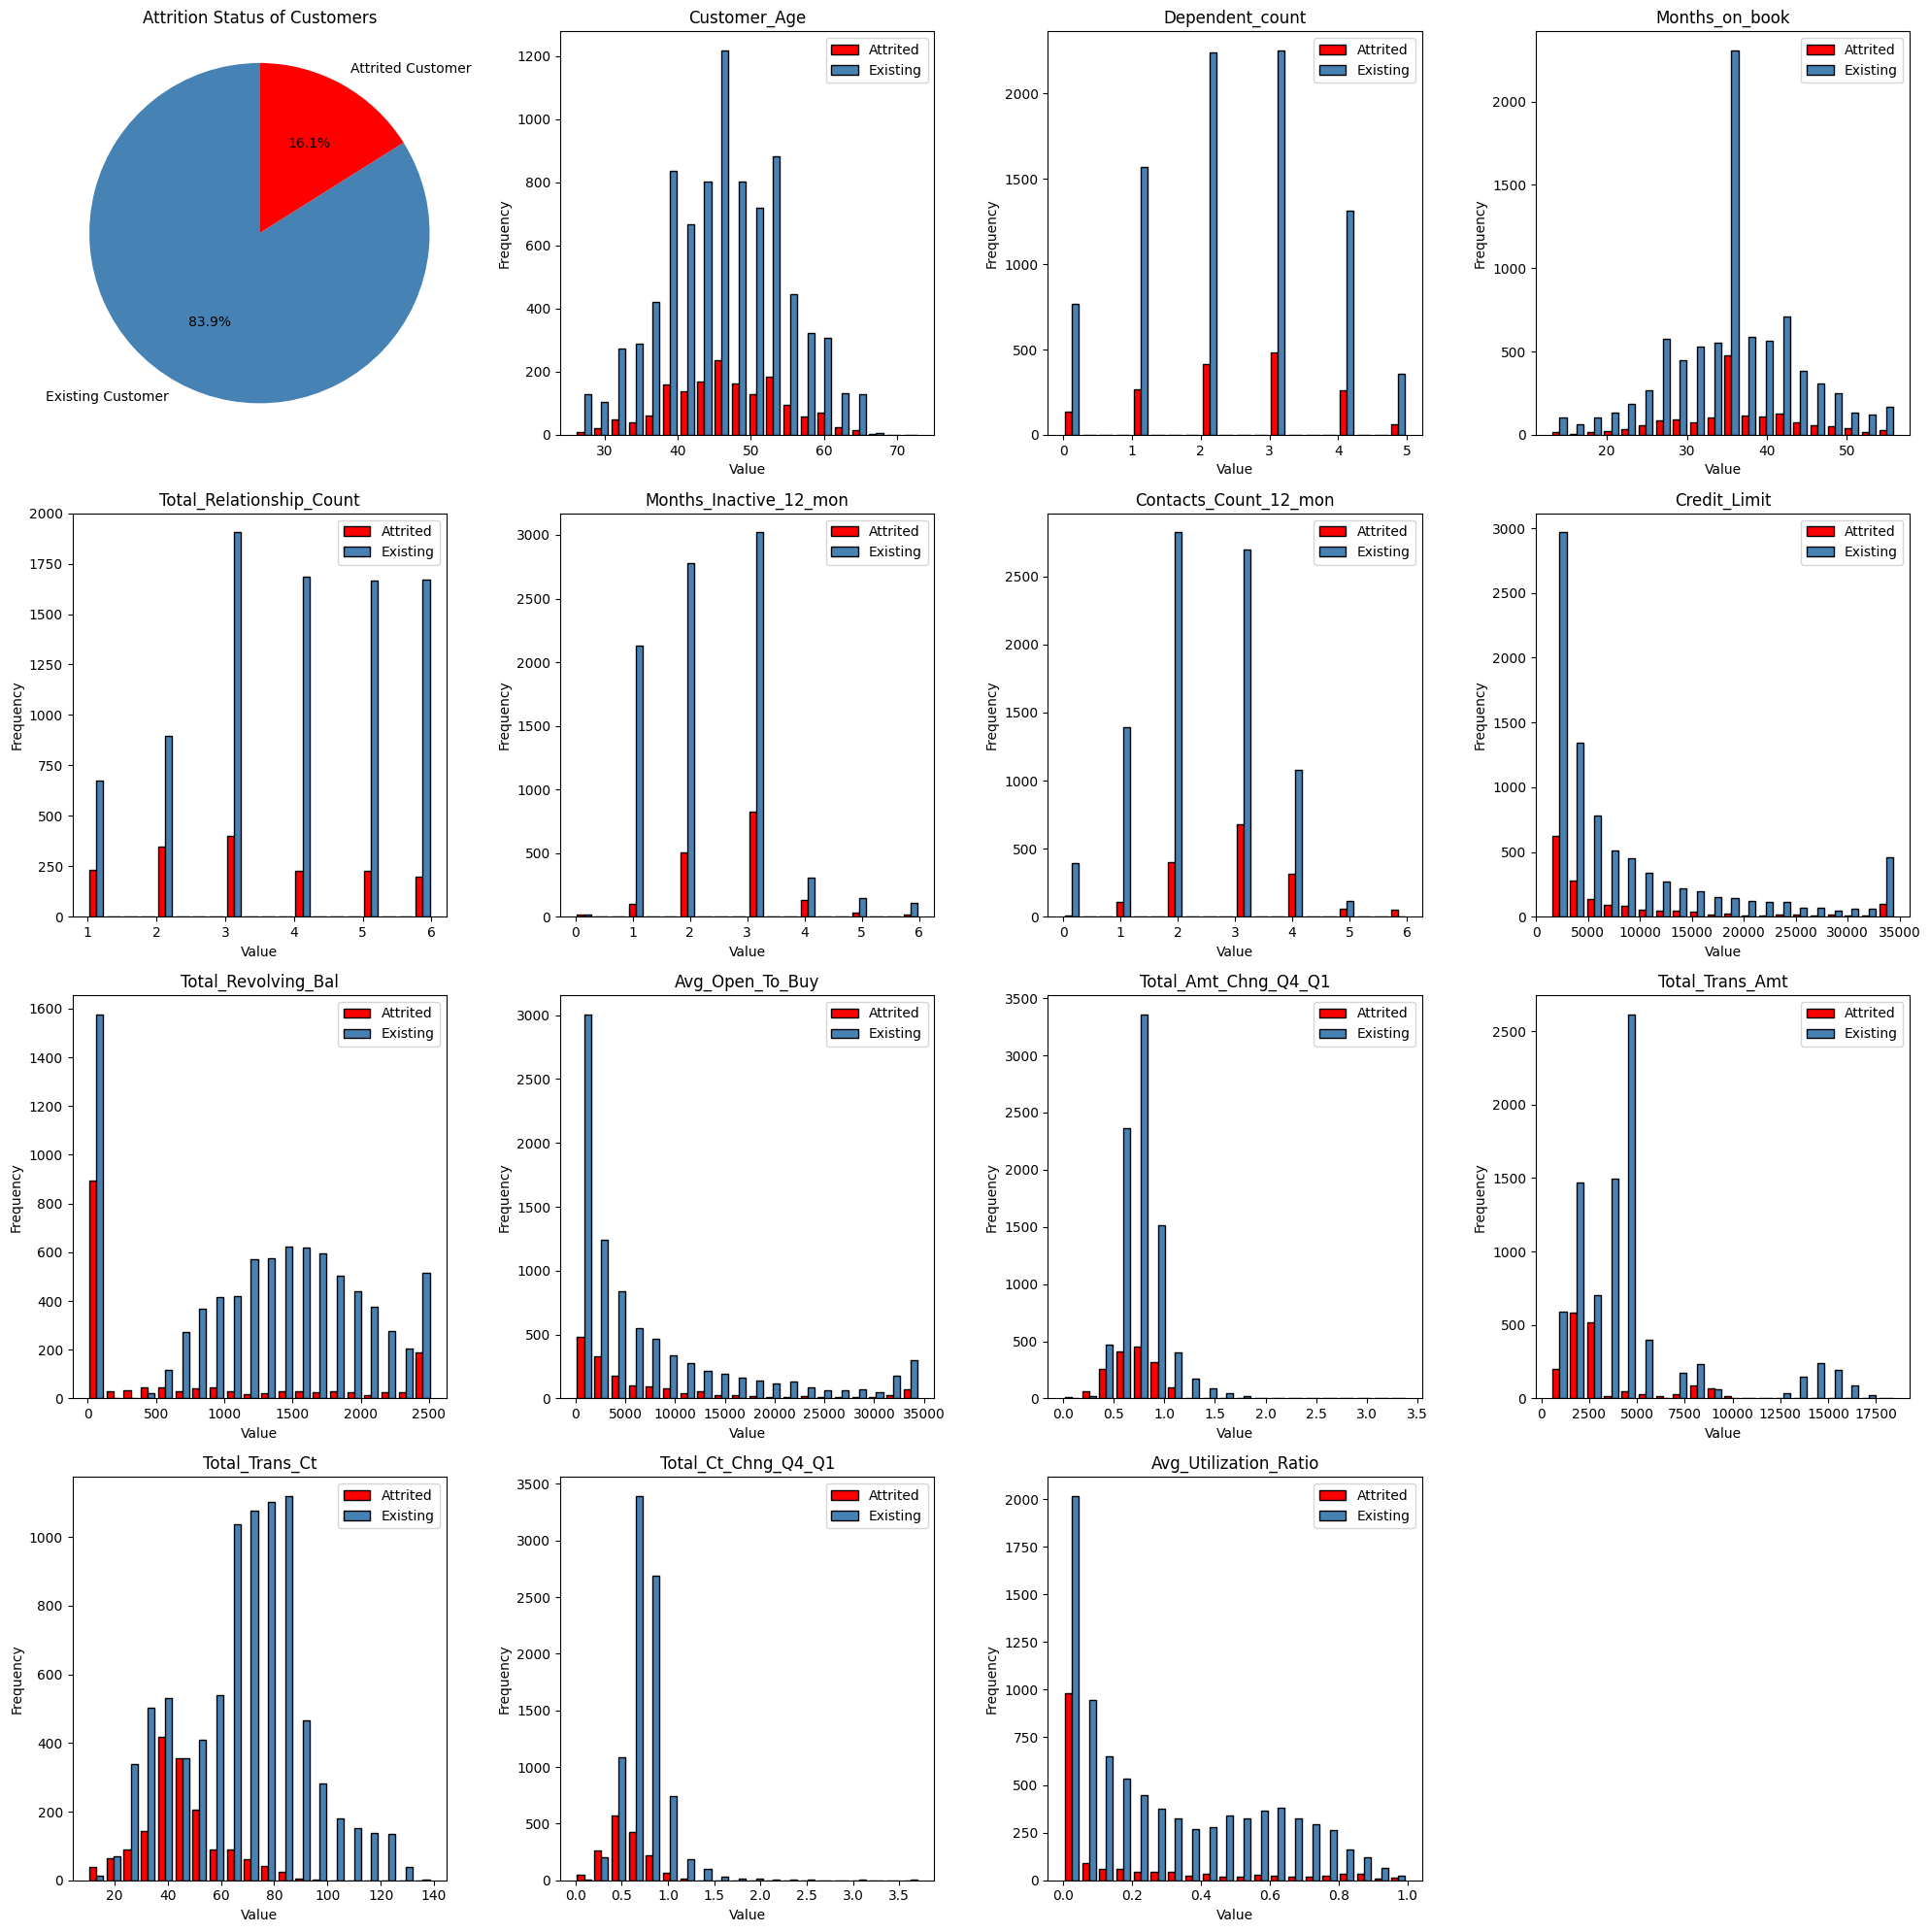

In [100]:
# Filter churners by Attrition_Flag
attrited_df = churners_df[churners_df['Attrition_Flag'] == 'Attrited Customer']
existing_df = churners_df[churners_df['Attrition_Flag'] == 'Existing Customer']

# Get the numerical columns
numerical_columns = churners_df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots with a suitable layout
num_cols = len(numerical_columns)
num_rows = (num_cols + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot combined pie chart for attrited and existing customers
total_counts = churners_df['Attrition_Flag'].value_counts()
total_labels = total_counts.index
total_colors = ['steelblue', 'red']
total_autopct = '%1.1f%%'
total_startangle = 90
axes[0].pie(total_counts, labels=total_labels, colors=total_colors, autopct=total_autopct, startangle=total_startangle)
axes[0].set_title('Attrition Status of Customers')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plot histograms for numerical columns
for i, col in enumerate(numerical_columns):
    ax = axes[i + 1]  # Start from index 1
    attrited_data = attrited_df[col]
    existing_data = existing_df[col]
    ax.hist([attrited_data, existing_data], bins=20, color=['red', 'steelblue'], edgecolor='black', label=['Attrited', 'Existing'])
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any empty subplots
for i in range(len(numerical_columns) + 1, num_rows * 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Corrolation
--> strong correlation between "Total_Trans_Amt" and "Total_Trans_Ct"
    customers who make more transactions are likely to spend more money.

--> strong correlation between  "Months_on_book" and "Customer_Age":
    customers who have been with a bank for a longer time are likely to be older. 

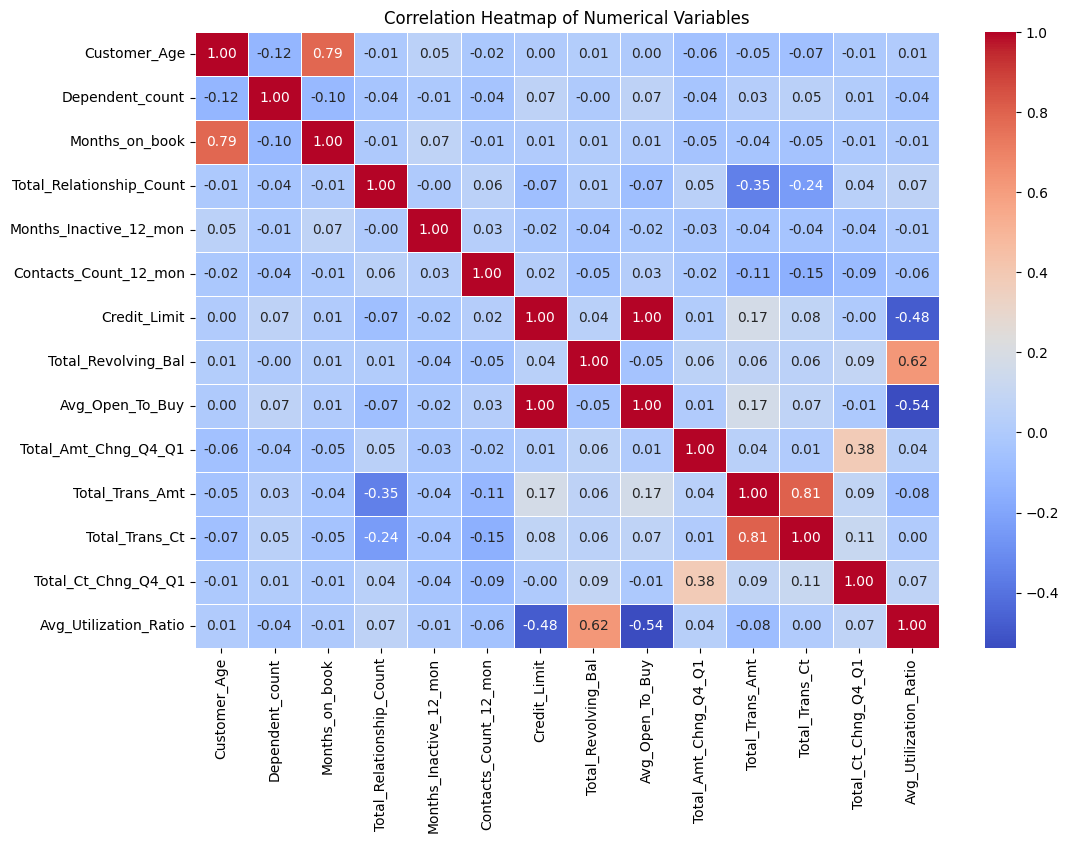

In [ ]:
churners_num_df = churners_df.select_dtypes(include=['int64', 'float64'])

corr_matrix = churners_num_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()